In [6]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from scipy.interpolate import spline
from scipy.stats import friedmanchisquare

# Enable inline plotting
%matplotlib inline

import seaborn as sns; sns.set()
import numpy as np
#sns.set_style("white")

import scipy.stats as stat
import os.path as path
from scipy.interpolate import interp1d

In [3]:
resultFP = r'C:\Users\kumar\OneDrive\Desktop\Result 2 - Copy.csv'
resultDF = pd.read_csv(resultFP)
resultDF.head()

,FileName,Alpha,CharRuleCount,MCBRuleCount,CharConditionCount,MCBConditionCount,StarCharRuleCount,StarMCBRuleCount,StarCharConditionCount,StarMCBConditionCount
0,wine-35,1.0,31,38,107,134,6,21,45,200
1,wine-35,0.9,31,38,107,134,13,21,92,200
2,wine-35,0.8,32,38,112,134,19,18,140,163
3,wine-35,0.7,34,38,125,134,19,18,141,163
4,wine-35,0.6,34,38,125,134,19,20,133,172


In [3]:
graphPath = r'C:\Users\kumar\OneDrive\Documents\Projects\CharMax\CharMax\Graphs'

In [3]:
resultDF.head(10)

,FileName,Alpha,CharRuleCount,MCBRuleCount,CharConditionCount,MCBConditionCount
0,wine-35,1.0,31,24,97,84
1,wine-35,0.9,31,24,97,84
2,wine-35,0.8,32,24,102,84
3,wine-35,0.7,34,24,115,84
4,wine-35,0.6,34,24,115,84
5,wine-35,0.5,37,24,134,84
6,wine-35,0.4,37,24,134,84
7,wine-35,0.3,37,24,134,84
8,wine-35,0.2,33,24,111,84
9,wine-35,0.1,33,24,111,84


In [21]:
#list_data = [resultDF.loc[:"CharRule", "a"], resultDF.loc["2003":, "b"]]

testDF = resultDF.loc[resultDF['FileName'] == "echo-35"]

AttributeError: 'Series' object has no attribute 'sort'

In [12]:
resultDF.Alpha.values

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. , 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. , 1. , 0.9, 0.8, 0.7,
       0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5,
       0.4, 0.3, 0.2, 0.1, 0. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,
       0.2, 0.1, 0. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
       0. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [15]:
#ax = sns.lineplot(x='Alpha',y=['CharRuleCount','MCBRuleCount'], data=testDF)

from scipy.interpolate import make_interp_spline, BSpline

#xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(testDF['Alpha'].values, testDF['CharRuleCount'].values, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(testDF['Alpha'],power_smooth)
plt.show()

ValueError: Expect x to be a 1-D sorted array_like.

In [42]:
def GraphRule(testDF,File):
    fig = plt.figure(figsize=(8,5))
    x_smooth = np.linspace(testDF.Alpha.min(),testDF.Alpha.max(),300) #300 represents number of points to make between T.min and T.max

    plt.plot( 'Alpha', "CharRuleCount",data=testDF, marker='o', markerfacecolor='darkblue', markersize=4, color='blue',
         linewidth=1,label="CS?")
    plt.plot( 'Alpha', 'MCBRuleCount', data=testDF, marker='*', color='Green', linewidth=1,label="MCB?")
    plt.plot( 'Alpha', "StarCharRuleCount",data=testDF, marker='x', markersize=4, color='red',
         linewidth=1,label="CS*")
    plt.plot( 'Alpha', 'StarMCBRuleCount', data=testDF, marker='+', color='magenta', linewidth=1,label="MCB*")

    plt.legend()
    plt.title(File+" - Rule Count")
    plt.xlabel("Paramter Alpha")
    plt.ylabel("Rule Count")
    plt.savefig(path.join(graphPath,File+"-Rule.png"),dpi=600)
    return



In [25]:
def GraphCondition(testDF,File):
    #f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

    fig = plt.figure(figsize=(8,5))
    plt.plot( 'Alpha', "CharConditionCount",data=testDF, marker='o', markerfacecolor='darkblue',markersize=3, color='blue',
         linewidth=1,label="CS?")
    plt.plot( 'Alpha', 'MCBConditionCount', data=testDF, marker='*', color='Green',markersize=3, linewidth=1,label="MCB?")
    plt.plot( 'Alpha', "StarCharConditionCount",data=testDF, marker='x',markersize=3, color='red',
         linewidth=1,label="CS*")
    plt.plot( 'Alpha', 'StarMCBConditionCount', data=testDF, marker='+', color='magenta',markersize=3, linewidth=1,label="MCB*")
    plt.legend()
    plt.title(File+" - Condition Count")
    plt.xlabel("Paramter Alpha")
    plt.ylabel("Condition Count")
    plt.savefig(path.join(graphPath,File+"-Cond.png"),dpi=600)
    #plt.subplot(1, 2, 2)
    return


In [52]:
stat.wilcoxon(x=testDF["CharRuleCount"],y=testDF["MCBRuleCount"],)

C:\Users\kumar\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=10.5, pvalue=1.0)

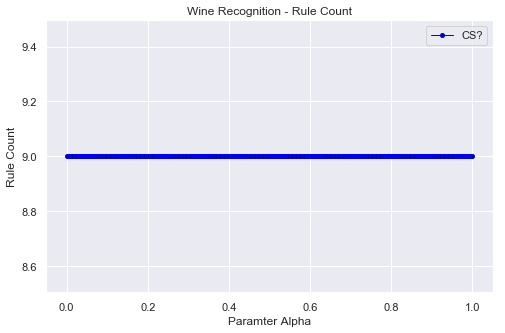

In [41]:
GraphRule(testDF,"Wine Recognition")

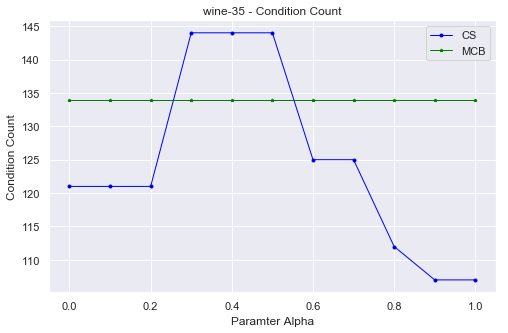

In [86]:

GraphCondition(testDF,"wine-35")


In [28]:
fileNames = resultDF.FileName.unique()


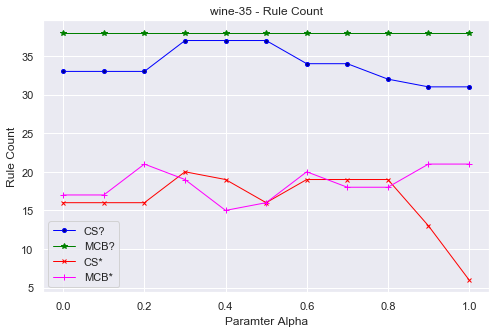

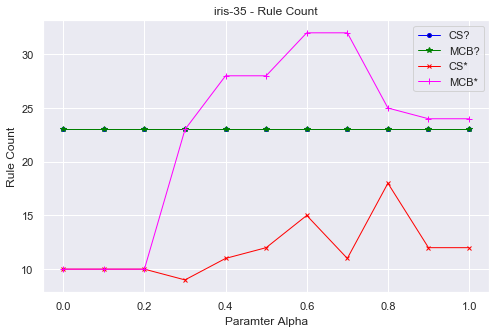

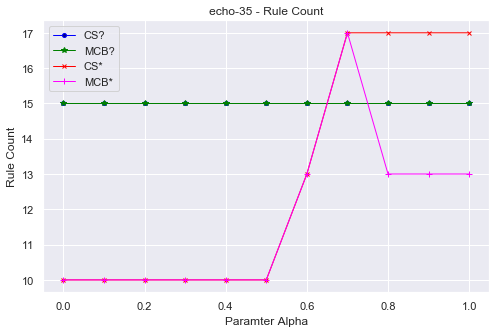

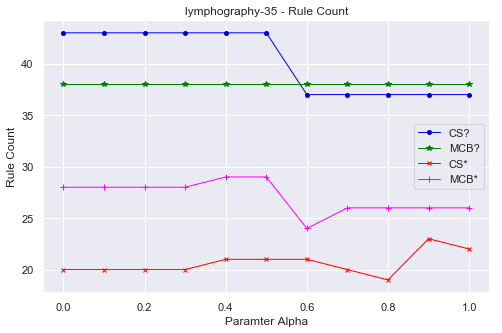

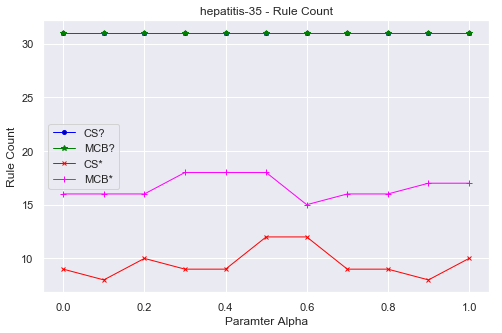

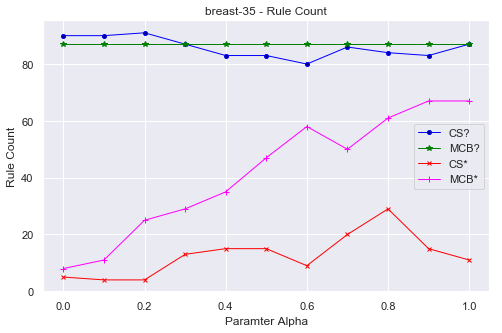

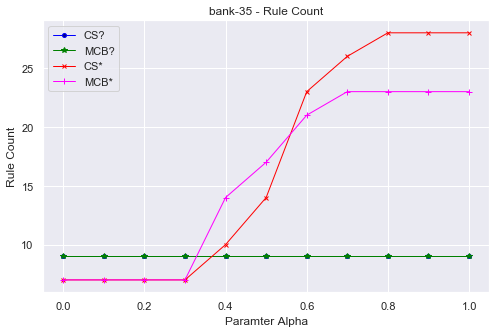

In [29]:
for file in fileNames:
    testDF = resultDF.loc[resultDF['FileName'] == file]
    GraphRule(testDF,file)

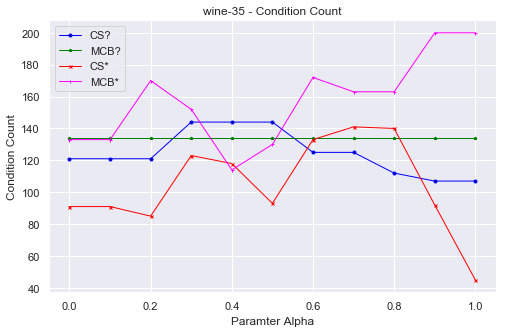

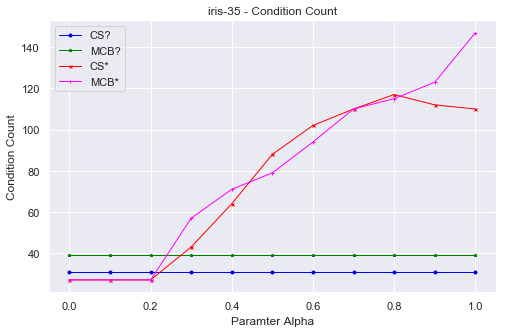

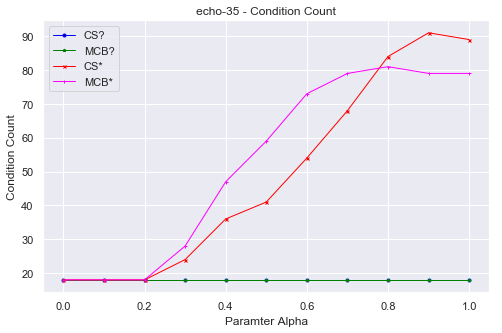

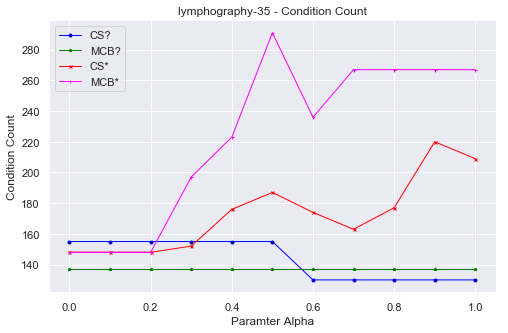

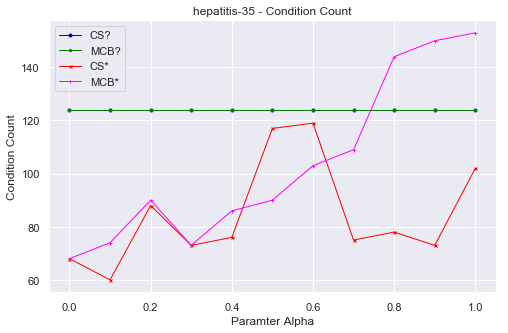

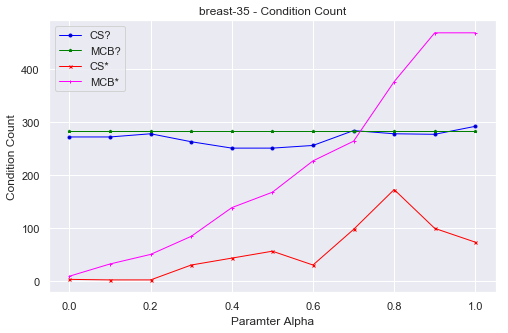

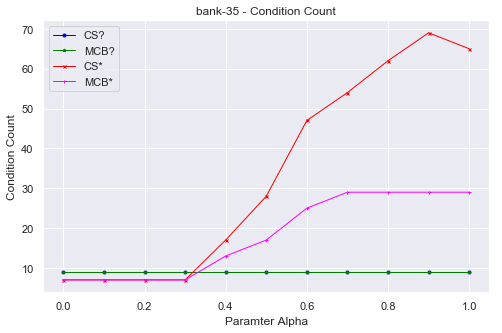

In [30]:
for file in fileNames:
    testDF = resultDF.loc[resultDF['FileName'] == file]
    GraphCondition(testDF,file)

In [42]:
# Friedman test

# StarMCBRuleCount
# StarCharRuleCount
# CharRuleCount
# MCBRuleCount

# compare samples
testDF = resultDF.loc[resultDF['FileName'] == "wine-35"]
stat, p = friedmanchisquare(testDF.CharRuleCount.values, testDF.MCBRuleCount.values ,testDF.StarMCBRuleCount.values
                           ,testDF.StarCharRuleCount.values
                           )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=30.083, p=0.000
Different distributions (reject H0)


In [50]:
# Friedman test

# StarMCBRuleCount
# StarCharRuleCount
# CharRuleCount
# MCBRuleCount

# compare samples
testDF = resultDF.loc[resultDF['FileName'] == "echo-35"]
stat, p = friedmanchisquare(#testDF.CharConditionCount.values
                            testDF.MCBConditionCount.values
                            ,testDF.StarMCBConditionCount.values
                           ,testDF.StarCharConditionCount.values
                           )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=12.250, p=0.002
Different distributions (reject H0)
